## Small field survey plan for astrometry data analysis validation

Following the suggestion in JASMINE-C3-TN-RO-20230208-01-validation, this notebook explore a survey plan for a small field of 1' x 1' around $(l,b)=(-0.3^{\circ}, 0.1^{\circ})$. We assume the detector's field of view of $0.48^{\circ}\times0.48^{\circ}$. We consider 100 orbits of observation to map this field as random as possible. In each orbit, we observe 4 fields. These 4 fields consist of two pair. One pair of two fields, vertical pair, has vertical offset by 0.24 deg, and another pair, horizontal pair, has horizontal offset by 0.24 deg. In each orbit, these two pairs should not have any overlap region. 

First, we set a survey field of 600x600 grid. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# centre of the survey field 
lc_sf = -0.3
bc_sf = 0.1
# size of the field, 1' 
dl_sf = 1.0/60.0
db_sf = 1.0/60.0
# set up 60 x 60 grid for the survey field.
nl = 60
nb = 60
dl_sfgrid = dl_sf/nl
db_sfgrid = db_sf/nb
print(' dl, db =', dl_sfgrid, db_sfgrid)

 dl, db = 0.0002777777777777778 0.0002777777777777778


In [3]:
# grid l and b centre start and end
ls_sfgrid = lc_sf-0.5*dl_sf+0.5*dl_sfgrid
bs_sfgrid = bc_sf -0.5*db_sf+0.5*db_sfgrid
#
le_sfgrid = lc_sf+0.5*dl_sf-0.5*dl_sfgrid
be_sfgrid = bc_sf+0.5*db_sf-0.5*db_sfgrid
# generate 1D grid
l_1dsfgrid = np.linspace (ls_sfgrid, le_sfgrid, nl)
b_1dsfgrid = np.linspace(bs_sfgrid, be_sfgrid, nb)
# generate 2d grid
l_sfgrid, b_sfgrid = np.meshgrid(l_1dsfgrid, b_1dsfgrid)

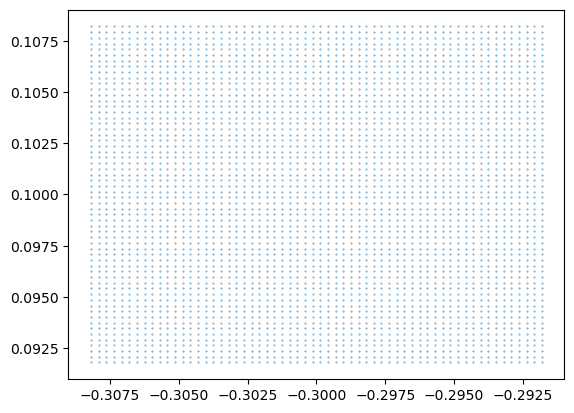

In [4]:
plt.scatter(l_sfgrid, b_sfgrid, s=0.1)

In [5]:
# number of observations
nobs_sfgrid = np.zeros_like(l_sfgrid)

### Define the size of the detector

In [6]:
# size of the detector
w_dtct = 0.48
# size of overlapping region
ol_dtct = 0.24
# size of the vertical pair
dl_vp = w_dtct
db_vp = 2.0*w_dtct-ol_dtct
# size of the horizontal pair
dl_hp = 2.0*w_dtct-ol_dtct
db_hp = w_dtct
print(' width of the detector (deg) =', w_dtct)
print(' size of the overlap area of a pair (deg) =', ol_dtct)
print(' db and dl for vertical and horizontal pair =', db_vp, dl_hp)

 width of the detector (deg) = 0.48
 size of the overlap area of a pair (deg) = 0.24
 db and dl for vertical and horizontal pair = 0.72 0.72


### Survey strategy

Observe the survey field with a random position in the vertical or horizontal pair. Then, the other pair obsreves a random field outside the survery field, because otherwise the edge of the detector will be used more.

#### If the vertical pair is chosen for the former observation

1. the centre of the vertical pair, (lc_vp, bc_vp), randomly from ls_sfgrid-0.5 dl_vp < lc_vp < le_sfgrid+0.5 dl_vp, bs_sfgrid-0.5 db_vp<bc_vp<le_sfgrid+0.5 db_vp.

2. Then, chose lc_the centre of the horizontal pair, (lc_hp, bc_hp), randomly to make sure that this pair does not observe the survey field. This is done by choosing the position around a rectangular with a width of dl_vp+dl_hp and a height of db_vp+db_hp. 

#### If the horizontal pair is chosen for the former observation

1. the centre of the horizontal pair, (lc_hp, bc_hp), randomly from ls_sfgrid-0.5 dl_hp < lc_hp < le_sfgrid+0.5 dl_hp, bs_sfgrid-0.5 db_hp<bc_vp<le_sfgrid+0.5 db_hp.

2. Then, chose lc_the centre of the horizontal pair, (lc_vp, bc_vp), randomly to make sure that this pair does not observe the survey field. 

In [9]:
# number of orbits
norb = 100
# number of small field per orbit
nsmfld_orb = 4
# number of small plates
npl_smfld = 24
# number of total observations
ntobs  = norb*nsmfld_orb*npl_smfld
print(' number of orbits =', norb)
print(' number of field per orbit and number of small plates per small field =', nsmfld_orb, ', ', npl_smfld)
print('total number of observations =', ntobs)
# observation info tracking 
orbit_id_obs = np.zeros(ntobs, dtype=int)
field_id_obs = np.zeros(ntobs, dtype=int)
plate_id_obs = np.zeros(ntobs, dtype=int)
lc_obs = np.zeros(ntobs)
bc_obs = np.zeros(ntobs)
pa_obs = np.zeros(ntobs)
# the width (in l) and height (in b) and total length of the line of rectangular for the latter pair
dlra_lp = 0.5*(dl_vp + dl_hp)
dbra_lp = 0.5*(db_vp + db_hp)
lenra_lp = 2.0*dlra_lp + 2.0*dbra_lp
# the offset between the centre of the field and the centre of the pair
dpc_fldc = 0.5*w_dtct - 0.5*ol_dtct
print(' offset between the centre of the field and the centre of the pair =', dpc_fldc)

 number of orbits = 100
 number of field per orbit and number of small plates per small field = 4 ,  24
total number of observations = 9600
 offset between the centre of the field and the centre of the pair = 0.12


In [12]:
# running the random surveys
iobs =0
lc_smfld = np.zeros(nsmfld_orb)
bc_smfld = np.zeros(nsmfld_orb)
for iorb in range(norb):
    ifld = 0
    vorh = np.random.random_sample()
    if vorh < 0.5:
        # vertical pair first (former pair _fp)
        lc_fp = ls_sfgrid - 0.5*dl_vp + (le_sfgrid + dl_vp - ls_sfgrid)*np.random.random_sample()
        bc_fp = bs_sfgrid - 0.5*db_vp + (be_sfgrid + db_vp - bs_sfgrid)*np.random.random_sample()
        # centre of the pair field id 0 (upper) and 1 (lower)
        lc_smfld[0] = lc_fp 
        bc_smfld[0] = bc_fp + dpc_fldc
        lc_smfld[1] = lc_fp 
        bc_smfld[1] = bc_fp - dpc_fldc
    else: 
        # horizontal pair first 
        lc_fp = ls_sfgrid - 0.5*dl_hp + (le_sfgrid + dl_hp - ls_sfgrid)*np.random.random_sample()
        bc_fp = bs_sfgrid - 0.5*db_hp + (be_sfgrid + db_hp - bs_sfgrid)*np.random.random_sample()
        # centre of the pair field id 0 (left) and 1 (right)
        lc_smfld[0] = lc_fp - dpc_fldc
        bc_smfld[0] = bc_fp 
        lc_smfld[1] = lc_fp + dpc_fldc
        bc_smfld[1] = bc_fp
    # for latter pair
    dlenra = np.random.random_sample()
    if dlenra < dbra_lp/lenra_lp:
        # starting from left side of the rectangular from the bottom
        lc_lp = lc_fp - 0.5*dlra_lp
        bc_lp = bc_fp - 0.5*dbra_lp + dlenra*lenra_lp 
    elif dlenra < (dbra_lp+dlra_lp)/lenra_lp:
        # top side of the rectangular from left
        lc_lp = lc_fp - 0.5*dlra_lp + dlenra*lenra_lp-dbra_lp
        bc_lp = bc_fp +0.5*dbra_lp
    elif dlenra < (2.0*dbra_lp+dlra_lp)/lenra_lp:
        # right side of the rectangular from top
        lc_lp = lc_fp + 0.5*dlra_lp 
        bc_lp = bc_fp +0.5*dbra_lp - (dlenra*lenra_lp - (dbra_lp+dlra_lp))
    else:
        # bottom side of the rectangular from left
        lc_lp = lc_fp + 0.5*dlra_lp - (dlenra*lenra_lp - (dbra_lp*2.0 + dlra_lp)) 
        bc_lp = bc_fp - 0.5*dbra_lp
    # set the filed centre
    if vorh < 0.5:
        # latter pair is horizontal pair 2 (left) and 3 (right)
        lc_smfld[2] = lc_lp - dpc_fldc
        bc_smfld[2]= bc_lp 
        lc_smfld[3] = lc_lp + dpc_fldc
        bc_smfld[3] = bc_lp
    else:
        # latter pair is vertical pair 2 (upper) and 3 (lower)
        lc_smfld[2] = lc_lp 
        bc_smfld[2] = bc_lp + dpc_fldc
        lc_smfld[3] = lc_lp 
        bc_smfld[3] = bc_lp - dpc_fldc
    # set orbit id 
    orbit_id_obs[iobs: iobs+nsmfld_orb*npl_smfld] = iorb
    # for small field
    ifld = 0
    for ifld in range(nsmfld_orb):
        field_id_obs[iobs: iobs+npl_smfld] = ifld
        for ipl in range(npl_smfld):
            plate_id_obs[iobs] = ipl
            lc_obs[iobs] = lc_smfld[ifld]
            bc_obs[iobs] = bc_smfld[ifld]
            iobs += 1
print(' number of total observation =', iobs)

 number of total observation = 9600


In [14]:
print(' orbit id start and end ', orbit_id_obs[0], orbit_id_obs[-1])
print(' orbit id start and end ', field_id_obs[0], field_id_obs[-1])

 orbit id start and end  0 99
 orbit id start and end  0 3


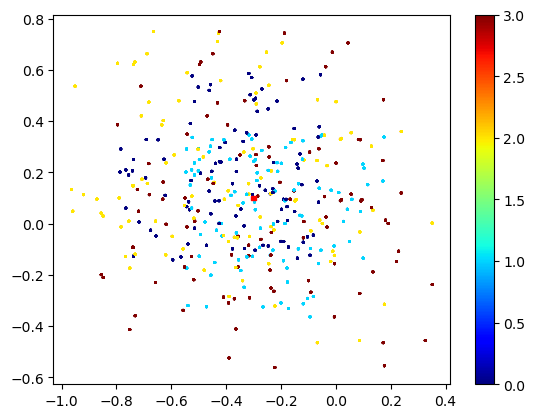

In [53]:
from matplotlib.patches import Rectangle
from matplotlib import cm
fig, ax = plt.subplots()
cx = ax.scatter(lc_obs, bc_obs, c=field_id_obs, s=1, cmap=cm.jet)
# plt.scatter(lc_sf, bc_sf, s=100, marker='D', c='red')
ax.add_patch(Rectangle((lc_sf-0.5*dl_sf, bc_sf-0.5*db_sf), dl_sf, db_sf, color='r'))
fig.colorbar(cx)


In [56]:
# compute number of observations
ncobs_grid = np.zeros_like(l_sfgrid)
for i in range(ntobs):
    # grid covered by the small field
    sindx = np.where((l_sfgrid > lc_obs[i]-0.5*w_dtct)*(l_sfgrid < lc_obs[i]+0.5*w_dtct)
                     *(b_sfgrid > bc_obs[i]-0.5*w_dtct)*(b_sfgrid < bc_obs[i]+0.5*w_dtct))
    ncobs_grid[sindx] +=1

In [58]:
print(ncobs_grid)

[[4224. 4224. 4224. ... 4176. 4176. 4176.]
 [4224. 4224. 4224. ... 4176. 4176. 4176.]
 [4224. 4224. 4224. ... 4176. 4176. 4176.]
 ...
 [4224. 4224. 4224. ... 4224. 4224. 4224.]
 [4224. 4224. 4224. ... 4224. 4224. 4224.]
 [4224. 4224. 4224. ... 4224. 4224. 4224.]]


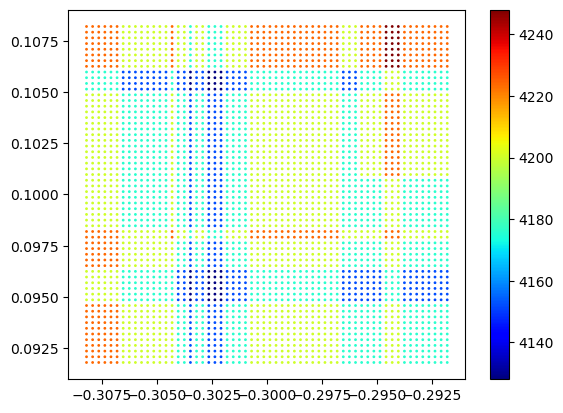

In [60]:
cx = plt.scatter(l_sfgrid, b_sfgrid, c=ncobs_grid, s=1, cmap=cm.jet)
plt.colorbar(cx)

In [63]:
from astropy.table import QTable,Table
small_survey = QTable()
small_survey['orbit_id'] = orbit_id_obs
small_survey['field_id'] = field_id_obs
small_survey['plate_id'] = plate_id_obs
small_survey['longitude']  = lc_obs
small_survey['latitude']  = bc_obs
small_survey['position angle'] = pa_obs

small_survey.write('small_survey.fits', format='fits', overwrite=True)